# **MLESS Project Group 13 : Predicting Future Population Distributions**

---





> Pranav Vatsal     19EE30019 

> Amruit Sahoo      19EE10005

> Subhadeep Paul    19EE3FP03

> Subham            19ME30069

> Gurram Manoj Reddy 19EE10025



# **ABSTRACT**
> This project demonstrates our work on predicting future population distributions upto 2050 by analyzing past population dataset (1960-2021) and using Machine Learning. 

# **INTRODUCTION**

>**Population Distribution:** <br><br> We can define population distribution as the pattern of where people live. Population distribution is perhaps the most essential of all geographic expressions, because the ways in which people have organized themselves in space at any given time represent the sum of all of the advances they have made to their overall geographical area. Population distribution can also describe how people are arranged according to different variables such as age, sex, religion, or race.
<br><br>World population distribution is uneven. Sparsely-populated regions are usually harsh places to live. These places usually have hostile environments; some examples are the Sahara Desert or Antarctica. Densely populated areas have more habitable environments – for instance, most of Europe.
<br><br>When we talk about population and its characteristics, it is easy to confuse similar concepts. For example, you may confuse population distribution with population density. Population density is the number of people per unit of land area, whereas population distribution is the pattern of where the people live. When you study population distribution and density at the global level, they are both usually depicted graphically by how many people live in a square mile. When you study population at the local or regional level, you can get a better view of patterns in where people live and how they’re distributed. There are three basic patterns of population distribution: they can equally-spaced apart (uniform dispersion), randomly spread out with no predictable pattern (random dispersion), or bunched in groups (clumped dispersion).
<br><br>An example of population distribution is the fact that India’s natural physical conditions resulted in uneven population distribution. There is a huge contrast in the number of people living in metropolitan part of India compared to the distribution in rest of the country.<br><br>

>**Factors affecting population distribution:** <br><br>
 There are numerous factors that explain why the population of the world has settled in locations that they inhabit today. These patterns of population distribution vary depending on the scale you are analyzing. You can study the distribution of a city or region, or you can look at the patterns from a global perspective. Factors that affect population distribution can be either be physical in nature or a by-product of the human condition. <br><br>
These factors, however, operate not in a vacuum, but in concert with one another. It is impossible, then, to identify the influence of any one factor on population distribution. The relationship between these elements is not a simple one, and your job as a geographer is to explain how each of these factors plays into the abnormality of any population distribution.


# **Our Code & Work:**

## Loading the python libraries:


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from numpy.ma.core import size
from ctypes import sizeof
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
!pip install shutup
import shutup
shutup.please()

## Importing the data:

In [23]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv").set_index("Country Name")
data_IND = data.iloc[:28,:]
data_IND.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],1966 [YR1966],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
Country Name,,,,,,,,,,,,,,,,,,,,,
India,IND,"Population ages 00-04, female",SP.POP.0004.FE,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,...,59652862.0,58512576.0,57423770.0,56617737.0,55601232.0,55259151.0,55382130.0,55596970.0,55651093.0,56100000.0
India,IND,"Population ages 00-04, male",SP.POP.0004.MA,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,...,65665011.0,64420191.0,63252954.0,62365571.0,61298734.0,60913347.0,60997218.0,61184852.0,61228414.0,61705000.0
India,IND,"Population ages 05-09, female",SP.POP.0509.FE,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,...,60388164.0,60470810.0,60431637.0,60178746.0,59819851.0,59122891.0,58133705.0,57039427.0,56104958.0,55470000.0
India,IND,"Population ages 05-09, male",SP.POP.0509.MA,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,...,67500938.0,67377416.0,67108452.0,66646489.0,66103641.0,65243099.0,64117537.0,62910580.0,61877169.0,61156000.0
India,IND,"Population ages 10-14, female",SP.POP.1014.FE,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,...,59134718.0,59380542.0,59589477.0,59760885.0,59979534.0,60140083.0,60231318.0,60172728.0,59853324.0,59247000.0


## Data Preprocessing




In [24]:
data_IND.drop(columns=['Country Code', 'Series Code'], inplace = True)
data_IND.insert(1, "Gender", ["F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"], True)
age_group = ["00-04", "00-04", "05-09", "05-09", "10-14", "10-14", "15-19", "15-19", "20-24", "20-24", "25-29", "25-29", "30-34", "30-34", "35-39", "35-39", "40-44", "40-44", "45-49", "45-49", "50-54", "50-54", "55-59", "55-59", "60-64", "60-64", "65 and above", "65 and above"]
data_IND.insert(2,"Age Group", age_group , True)
data_IND.drop(columns=['Series Name'], inplace = True)

replace = dict()
for i in range(1960, 2022):
    replace[str(i) + " [YR" + str(i) + "]"] = i
data_IND.rename(columns = replace, inplace = True)

data_IND.head()

,Gender,Age Group,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country Name,,,,,,,,,,,,,,,,,,,,,
India,F,00-04,35572818.0,35930615.0,36528246.0,37319907.0,38144129.0,38905245.0,39825397.0,40463405.0,...,59652862.0,58512576.0,57423770.0,56617737.0,55601232.0,55259151.0,55382130.0,55596970.0,55651093.0,56100000.0
India,M,00-04,37677168.0,37843989.0,38436264.0,39352071.0,40317074.0,41150488.0,42143830.0,42824436.0,...,65665011.0,64420191.0,63252954.0,62365571.0,61298734.0,60913347.0,60997218.0,61184852.0,61228414.0,61705000.0
India,F,05-09,29566250.0,30625739.0,31424388.0,31940934.0,32277654.0,32599959.0,33235222.0,33935875.0,...,60388164.0,60470810.0,60431637.0,60178746.0,59819851.0,59122891.0,58133705.0,57039427.0,56104958.0,55470000.0
India,M,05-09,31987422.0,33251452.0,34131332.0,34617319.0,34877302.0,35168459.0,35774983.0,36476092.0,...,67500938.0,67377416.0,67108452.0,66646489.0,66103641.0,65243099.0,64117537.0,62910580.0,61877169.0,61156000.0
India,F,10-14,23182201.0,24090296.0,25174740.0,26380145.0,27562100.0,28555875.0,29306132.0,29939164.0,...,59134718.0,59380542.0,59589477.0,59760885.0,59979534.0,60140083.0,60231318.0,60172728.0,59853324.0,59247000.0


## Data Prediction using XGBoost Linear Regressor 

Extracting X and y from the data

In [25]:
def gen_Xy(sz, Data, fyear = 2021):
    input=[]
    output=[]
    for k in range(0,28):
        for i in range(1960,fyear-sz+1):
            temp=[]
            for j in range(i,i+sz):
                temp.append(Data[j][k])
            input.append(temp)
            output.append(Data[i+sz][k])
    input = np.array(input)
    output = np.array(output)
    return input, output

Using XGBoost Regressor

In [26]:
def xgb_model_training(input, output):
    model_xgb = xgb.XGBRegressor(verbosity = 0, silent=True)

    input_train, input_test, output_train, output_test = train_test_split(input, output, test_size=0.1)

    model_xgb.fit(input_train,output_train)
    
    a=mean_absolute_error(output_test, model_xgb.predict(input_test))
    return a

## Training  XGBoost model for various sizes

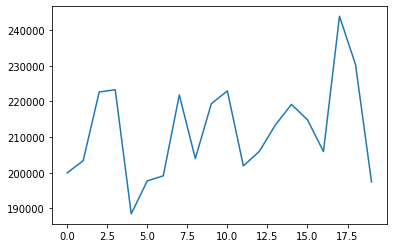

In [27]:
error = []
for sz in range(1, 21):
    input, output = gen_Xy(sz, data_IND)
    e = xgb_model_training(input, output)
    error.append(e)

plt.plot(error)

## Predicting Future data for 30 years

In [28]:
for i in range(30):
    input, output = gen_Xy(5, data_IND, 2021 + i)
    model_xgb = xgb.XGBRegressor(verbosity = 0, silent=True)
    model_xgb.fit(input,output)
    l = []
    for j in range(28):
        l.append(list(data_IND.iloc[j, -5:]))
    data_IND[2022+i] = model_xgb.predict(l)

# **Different Plots**

In [29]:
age_with_gender = []
for i in range(len(age_group)):
    age_with_gender.append(age_group[i] + (" Female" if i%2 == 0 else " Male"))

 The below pie-chart represents the population distribution of both male and female of different age groups in the year 1960, 2021 and 2050 respectively.

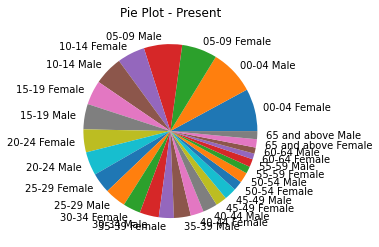

In [30]:
plt.pie(list(data_IND.loc[:,1960]), labels=age_with_gender)
plt.title("Pie Plot - Present")
plt.show()

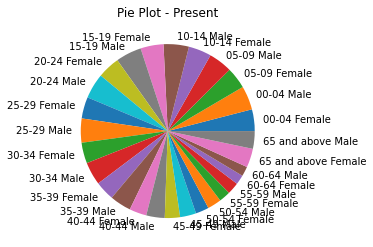

In [31]:
plt.pie(list(data_IND.loc[:,2021]), labels=age_with_gender)
plt.title("Pie Plot - Present")
plt.show()

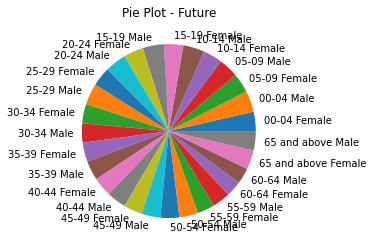

In [32]:
plt.pie(list(data_IND.loc[:,2050]), labels=age_with_gender)
plt.title("Pie Plot - Future")
plt.show()

In [33]:
x = []
y = []
for i in range(1960,2052):
    x.append(i)
    y.append(sum(list(data_IND.loc[:, i])))

The below plot represents the total population from 1960 - 2050 (predicted for years > 2021).

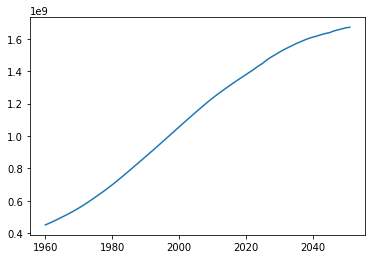

In [34]:
plt.plot(x, y)

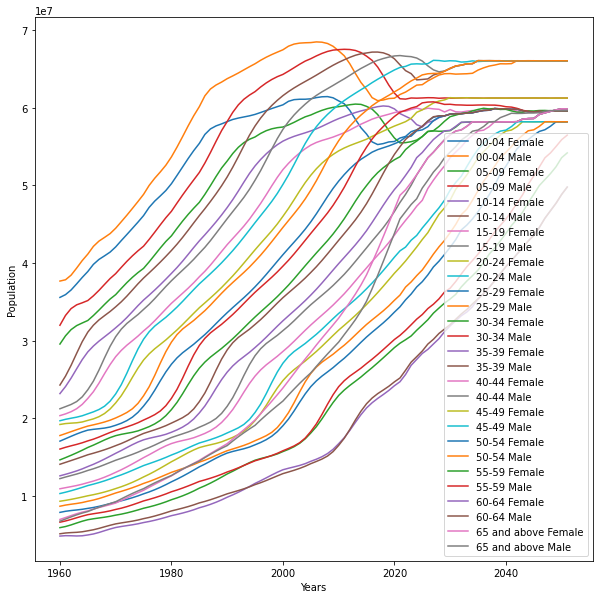

In [35]:
plt.figure(figsize=(10, 10))
plt.xlabel('Years')
plt.ylabel('Population')

for i in range(len(age_with_gender)):
    y = []
    for j in range(len(x)):
        y.append(data_IND.iloc[i, :][x[j]])
    plt.plot(x, y)

plt.legend(age_with_gender)
plt.show()

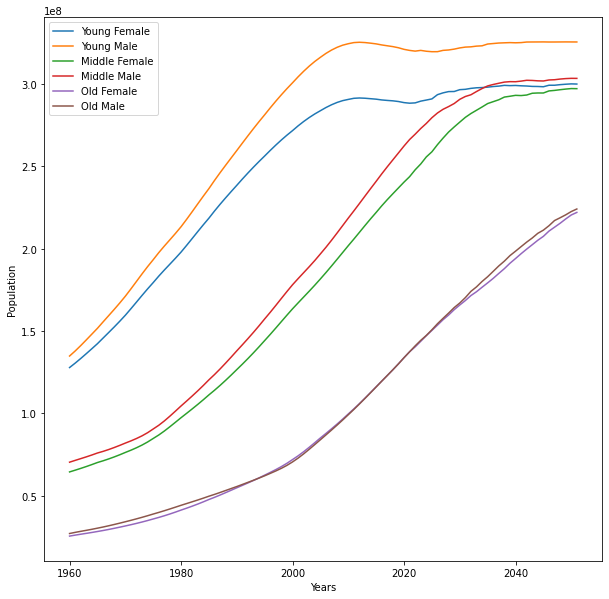

In [36]:
plt.figure(figsize=(10, 10))
plt.xlabel('Years')
plt.ylabel('Population')

ymy = []
yfy = []
for j in range(len(x)):
    yfy.append(sum(data_IND.iloc[[0,2,4,6,8], :][x[j]]))
    ymy.append(sum(data_IND.iloc[[1,3,5,7,9], :][x[j]]))
plt.plot(x, yfy, label = "Young Female")
plt.plot(x, ymy, label = "Young Male")

ymm = []
yfm = []
for j in range(len(x)):
    yfm.append(sum(data_IND.iloc[[10,12,14,16,18], :][x[j]]))
    ymm.append(sum(data_IND.iloc[[11,13,15,17,19], :][x[j]]))
plt.plot(x, yfm, label = "Middle Female")
plt.plot(x, ymm, label = "Middle Male")

ymo = []
yfo = []
for j in range(len(x)):
    yfo.append(sum(data_IND.iloc[[20,22,24,26], :][x[j]]))
    ymo.append(sum(data_IND.iloc[[21,23,25,27], :][x[j]]))
plt.plot(x, yfo, label = "Old Female")
plt.plot(x, ymo, label = "Old Male")

plt.legend()
plt.show()

# **Observation**

From our above plots we observed that:


*   The population of middle and older generation is increasing almost linearly whereas this is not the case for younger generation. For younger generation the population is getting saturated in recent years, which shows the increase in awareness regarding growing population problems and sex education.
*   We also observed that the slope of younger generation gets reflected in the slope of older generation after a certain period of time. This period of time is the same as the time passed between the point in the timeline where the current older generation was the younger generation and the present point. Similar shifts can also be seen between the middle-aged generation. This can be used to determine various properties like mortality rate and life expectancy.



# **Conclusion**
Predicting the future population distribution is an important and urgent task for a nation, especially in countries having a large population like India. With a great population comes a great number of responsibilities. Managing such a diverse demographic is a not an easy task. Many problems that can arise due to an uncontrolled population include unavailability of basic resources, low GDP, low standard of living, poverty, diseases & health hazards, etc. So, to tackle these potential problems analysing the present & past conditions to predict the future population distribution is of utmost importance.

India is a country of wide diversity and rich demographics. We have more than 50% of our population below the age of 25 and 65% below the age of 35, this was also visible from our previous plots. A lot of our population is concentrated in major cities but we also have a substantial part of our population living in villages which have sparse density. We have been seeing a steady decrease in birth rate and a steady increase in life expectancy. India also has a good sex ratio and a very good increase in literacy rates. These are some of the factors that can affect the population distribution of a nation. Throughout the states of India these factors have widely different values.

Taking into account these factors and analysing them can help us to predict the future population distributions. We can have a fair idea about what the future looks like and what steps the nation should take to tackle the upcoming problems.


*   As we had analysed from the previous plots and made a few observations, we had seen that the population of younger generation was saturating. This suggested that in a decade or so this pattern will repeat for the middle and older generation. Therefore, the share that young people hold of the total population is huge. The government can then decide to tweak their plans to cater the needs of a huge young population, for example employment opportunities, strong push to education and research, promoting youth politics, 
*    Social media is a huge part of our present day lives. Social media companies can base their projects on the demographic data of the nation to attract more usage and followers. For example: Instagram reels are specifically targeted to working class people on the go who want fast and good entertainment. Amazon customizes its recommendations based on the demographics of the specific region. 

Trying to predict the future population distribution there are many questions that arise in our mind, for example: “what if a pathbreaking technology is invented that can change the way we live”, “what if there is massive calamity in a certain region”, “what if there is an advancement in medical sciences that can make humans inhuman”, “what if we find the cure to cancer and other deadly diseases”, These are some questions that may be answered in the near future and can play a significant role in distributing the future population. We can never tell what the future holds for us, but at present the best clues are in the current demographic trends and pattern themselves.




# **References**


1.    [World bank :- Health Nutrition and Population statistics]( https://databank.worldbank.org/source/health-nutrition-and-population-statistics)
2.   [Developments in the prediction of effectivepopulation size](https://www.nature.com/articles/hdy1994174.pdf?origin=ppub)
3.   [A Population Prediction Strategy for Evolutionary Dynamic Multiobjective Optimisation](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6471286&tag=1)


